In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv('sign_mnist_train.csv')
test=pd.read_csv('sign_mnist_test.csv')

In [4]:
#Data Exploration

In [5]:
np.unique(train['label'].values)
labels=train['label'].values
labels.shape

(27455,)

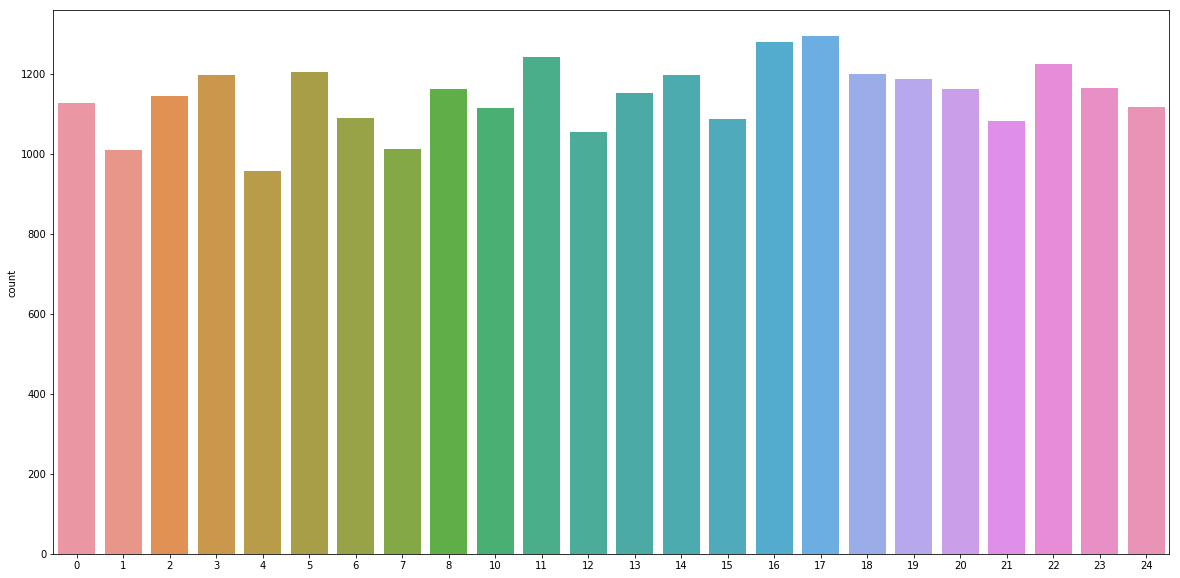

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(train['label'].values)

In [6]:
train.drop('label',1,inplace=True)

In [7]:
images=train.values
images=np.array([np.reshape(i,(28,28)) for i in images])

In [8]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer=LabelBinarizer()
labels=label_binarizer.fit_transform(labels)
labels.shape

(27455, 24)

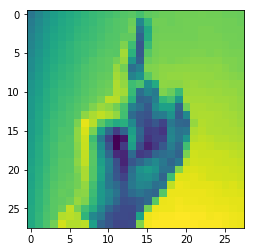

In [25]:
plt.imshow(images[0])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.3,random_state=101)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
#normalize
x_train=(x_train-np.average(x_train,axis=0))/np.std(x_train,axis=0)

In [12]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

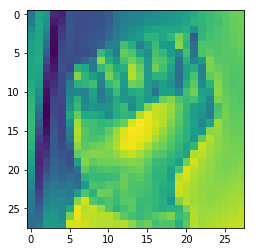

In [30]:
plt.imshow(x_train[0].reshape(28,28))

In [13]:
num_classes=24

In [14]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes,activation='softmax'))

In [15]:
model.compile(optimizer=keras.optimizers.adam(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 30s 2ms/step - loss: 0.9849 - acc: 0.6894 - val_loss: 6.0488 - val_acc: 0.6047
Epoch 2/50
19218/19218 [==============================] - 34s 2ms/step - loss: 0.0972 - acc: 0.9696 - val_loss: 5.7762 - val_acc: 0.6289
Epoch 3/50
19218/19218 [==============================] - 30s 2ms/step - loss: 0.0357 - acc: 0.9901 - val_loss: 7.8456 - val_acc: 0.5031
Epoch 4/50
19218/19218 [==============================] - 29s 2ms/step - loss: 0.0227 - acc: 0.9937 - val_loss: 6.6977 - val_acc: 0.5730
Epoch 5/50
19218/19218 [==============================] - 29s 2ms/step - loss: 0.0252 - acc: 0.9928 - val_loss: 3.9817 - val_acc: 0.7409
Epoch 6/50
19218/19218 [==============================] - 32s 2ms/step - loss: 0.0135 - acc: 0.9960 - val_loss: 4.2989 - val_acc: 0.7219
Epoch 7/50
19218/19218 [==============================] - 31s 2ms/step - loss: 0.0149 - acc: 0.9951 - val_loss: 3.4819 - val_acc:

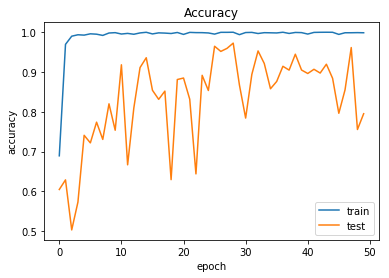

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [69]:
# test_labels = test['label']
# test.drop('label', axis = 1, inplace = True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binarizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

(7172, 28, 28, 1)

In [71]:
y_pred = model.predict(test_images)
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.852760736196319

In [18]:
from PIL import Image

In [36]:
img=Image.open('A.png').convert('L')
img.size

(126, 198)

In [37]:
img=img.resize((28,28),Image.ANTIALIAS)

In [38]:
img=np.array(img).reshape(1,28,28,1)
img.shape

(1, 28, 28, 1)

In [39]:
model.predict(img)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

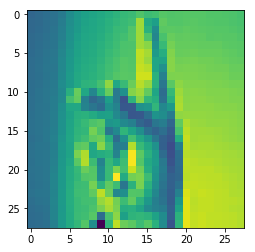

In [67]:
plt.imshow(test[test['label']==10].drop('label',1).values[0][:].reshape(28,28))